## Observations and Insights 

In [42]:
#1 When reviewing the information you can see that the most successful drug regimens are
#..Capomulin and Ramicane. This is observed by looking at the box and wnisker plot and seeing 
#..that the tumor volume at the end of the treatment was much smaller than the other drugs it 
#..was compared to. 
#2  The line plot used for the Capomulin drug treatment showed a significant decrese in tumor 
#..volume over time. 
#3 After completing the linear regression, we can see that the heavier the mouse,
#..the higher the tumor volume. 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as linregress

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [5]:
# Combine the data into a single dataset
mouse_data = "../data/Mouse_metadata.csv"
study_data = "../data/Study_results.csv"
mouse_data_df = pd.read_csv(mouse_data)
study_data_df = pd.read_csv(study_data)
#mouse_data_df
#study_data_df

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


In [7]:
combined_data = pd.merge(mouse_data_df,study_data_df, how="left", on="Mouse ID")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice.
combined_data["Mouse ID"].value_counts()


g989    13
a411    10
e476    10
d251    10
g316    10
        ..
x336     1
b447     1
h428     1
t573     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
total_unique_mice = combined_data["Mouse ID"].unique()
count_unique_mice = pd.DataFrame(total_unique_mice).count()
count_unique_mice

0    249
dtype: int64

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_mice = combined_data.loc[combined_data.duplicated(subset = ["Mouse ID","Timepoint"]),"Mouse ID"].unique()
#dup_mice
# Checking the number of mice in the clean DataFrame.
clean_df = combined_data[combined_data["Mouse ID"].isin(dup_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_data[combined_data["Mouse ID"].isin(dup_mice)==True]
dup_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
summary_stats
# This method produces everything in a single groupby function


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

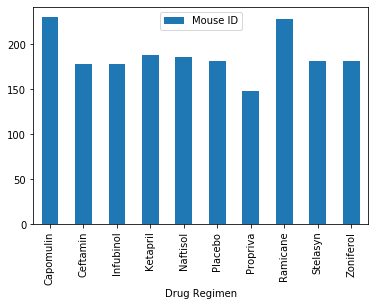

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
grouped_df = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count()).reset_index()
regimen = grouped_df[["Mouse ID","Drug Regimen"]]
regimen = regimen.set_index("Drug Regimen")
regimen.plot(kind="bar")
plt.show()


In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs = summary_stats.index.tolist()
#drugs
regimen_count = (clean_df.groupby(["Drug Regimen"])["Age_months"].count())
regimen_count


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Age_months, dtype: int64

Text(0.5, 0, 'Drug Regimen')

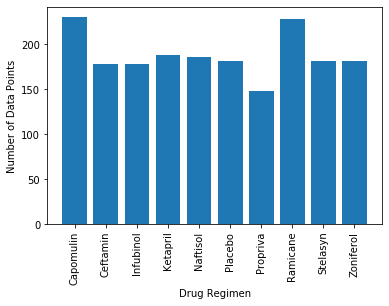

In [16]:
x_axis = np.arange(len(regimen_count))
x_axis = drugs
plt.bar(x_axis, regimen_count, alpha=1,align="center")
plt.xticks(rotation="vertical")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie_pd =pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_pie_pd


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


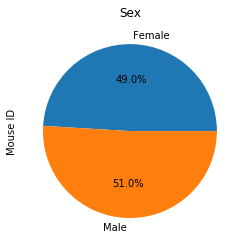

In [18]:
gender_pie_pd = gender_pie_pd[["Sex","Mouse ID"]]
#gender_pie_pd
gender_pie_pd.plot(kind="pie",y="Mouse ID", autopct="%1.1f%%", labels=gender_pie_pd["Sex"], title="Sex", legend=False)

Text(0.5, 1.0, 'Sex')

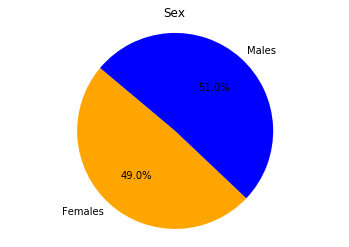

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie_py = (clean_df.groupby(["Sex"])["Age_months"].count()).tolist()
#gender_pie_py
labels = ["Females","Males"]
colors = ["orange","blue"]
plt.pie(gender_pie_py, labels=labels,colors=colors,autopct="%1.1f%%",startangle=140)
plt.axis("equal")
plt.title("Sex")

## Quartiles, Outliers and Boxplots

In [20]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ram_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
inf_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
cef_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
#cap_df
#ram_df
#inf_df
#cef_df

In [22]:
#Capomulin greatest timepoint 
cap_last = cap_df.groupby("Mouse ID").max()["Timepoint"]
#cap_last
cap_vol = pd.DataFrame(cap_last)
cap_merge = pd.merge(cap_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
cap_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [23]:
#Ramicane greatest timepoint
ram_last = ram_df.groupby("Mouse ID").max()["Timepoint"]
#ram_last
ram_vol = pd.DataFrame(ram_last)
ram_merge = pd.merge(ram_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ram_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [24]:
#Infubinol greatest timepoint 
inf_last = inf_df.groupby("Mouse ID").max()["Timepoint"]
inf_last
inf_vol = pd.DataFrame(inf_last)
inf_merge = pd.merge(inf_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
inf_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [25]:
#Ceftamin greatest timepoint 
cef_last = cef_df.groupby("Mouse ID").max()["Timepoint"]
#cap_last
cef_vol = pd.DataFrame(cef_last)
cef_merge = pd.merge(cef_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
cef_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [26]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine if there are any potential outliers 
# Determine outliers using upper and lower bounds
#Capomulin
cap_tumors = cap_merge["Tumor Volume (mm3)"]
cap_tumors
quartiles = cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumor treatment is: {lowerq}")
print(f"The upper quartile of Capomulin tumor treatment is: {upperq}")
print(f"The interquartile range of Capomulin tumor treatment is: {iqr}")
print(f"The the median of Capomulin tumor treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumor treatment is: 32.37735684
The upper quartile of Capomulin tumor treatment is: 40.1592203
The interquartile range of Capomulin tumor treatment is: 7.781863460000004
The the median of Capomulin tumor treatment is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [27]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine if there are any potential outliers 
# Determine outliers using upper and lower bounds
#Ramicane
ram_tumors = ram_merge["Tumor Volume (mm3)"]
ram_tumors
quartiles = ram_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumor treatment is: {lowerq}")
print(f"The upper quartile of Ramicane tumor treatment is: {upperq}")
print(f"The interquartile range of Ramicane tumor treatment is: {iqr}")
print(f"The the median of Ramicane tumor treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumor treatment is: 31.56046955
The upper quartile of Ramicane tumor treatment is: 40.65900627
The interquartile range of Ramicane tumor treatment is: 9.098536719999998
The the median of Ramicane tumor treatment is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [28]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine if there are any potential outliers 
# Determine outliers using upper and lower bounds
#Infubinol
inf_tumors = inf_merge["Tumor Volume (mm3)"]
inf_tumors
quartiles = inf_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumor treatment is: {lowerq}")
print(f"The upper quartile of Infubinol tumor treatment is: {upperq}")
print(f"The interquartile range of Infubinol tumor treatment is: {iqr}")
print(f"The the median of Infubinol tumor treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumor treatment is: 54.04860769
The upper quartile of Infubinol tumor treatment is: 65.52574285
The interquartile range of Infubinol tumor treatment is: 11.477135160000003
The the median of Infubinol tumor treatment is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [29]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine if there are any potential outliers 
# Determine outliers using upper and lower bounds
#Ceftamin
cef_tumors = cef_merge["Tumor Volume (mm3)"]
cef_tumors
quartiles = cef_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumor treatment is: {lowerq}")
print(f"The upper quartile of Ceftamin tumor treatment is: {upperq}")
print(f"The interquartile range of Ceftamin tumor treatment is: {iqr}")
print(f"The the median of Ceftamin tumor treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumor treatment is: 48.72207785
The upper quartile of Ceftamin tumor treatment is: 64.29983003
The interquartile range of Ceftamin tumor treatment is: 15.577752179999997
The the median of Ceftamin tumor treatment is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset     

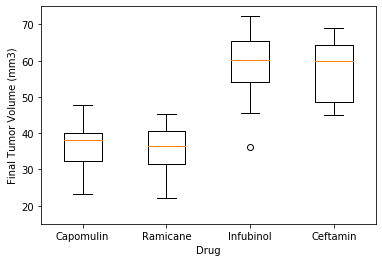

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_data = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug')
ax1.boxplot(tumor_data, labels=Regimen)

plt.ylim(15, 75)

plt.show()

## Line and Scatter Plots

In [32]:
cap_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_line = cap_df.loc[cap_df["Mouse ID"]=="l509",:]
cap_line

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


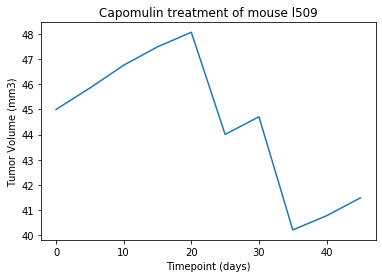

In [34]:
x_axis = cap_line["Timepoint"]
y_axis = cap_line["Tumor Volume (mm3)"]
plt.title("Capomulin treatment of mouse l509")
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [35]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_cap = pd.DataFrame(cap_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_cap = avg_cap.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
avg_cap.head()

,Mouse ID,Weight (g),Average Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


<function matplotlib.pyplot.show(*args, **kw)>

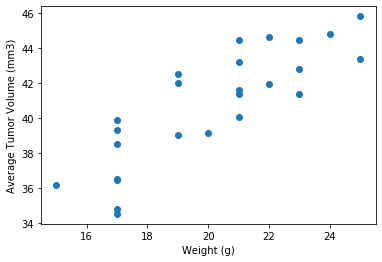

In [36]:
plt.scatter(avg_cap["Weight (g)"],avg_cap["Average Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_weight = cap_df.groupby(["Mouse ID"])["Weight (g)"].mean()
#cap_weight
cap_tumor = cap_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
#cap_tumor
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(cap_weight,cap_tumor)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


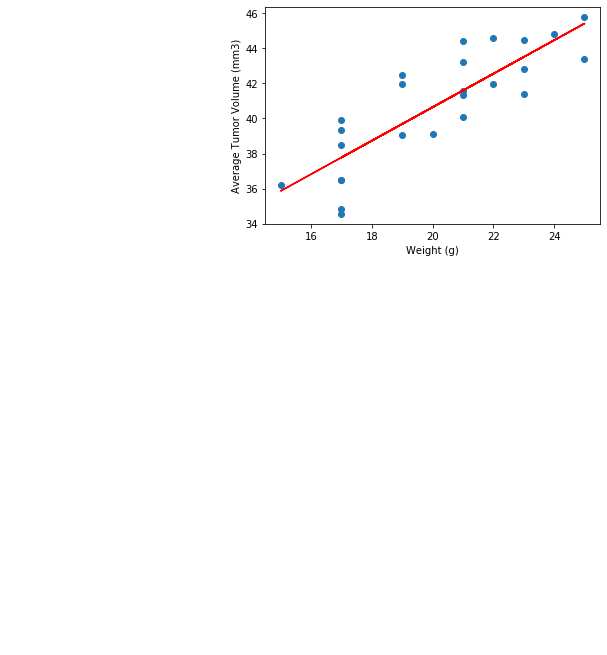

In [38]:
from scipy.stats import linregress

x_values = avg_cap["Weight (g)"]
y_values = avg_cap["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
